# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


### Il problema del commesso viaggiatore

Il Problema del Commesso Viaggiatore (TSP - Traveling Salesman Problem) è uno dei problemi fondamentali nell'ambito della teoria dei grafi e dell'ottimizzazione combinatoria. Il problema può essere descritto come segue: dato un insieme di città e le distanze tra ogni coppia di città, l'obiettivo è trovare il percorso più breve che visita ogni città esattamente una volta e ritorna alla città di partenza.

La complessità del TSP deriva dal fatto che il numero di possibili percorsi cresce esponenzialmente con il numero di città. Questo significa che, per un numero elevato di città, esaminare tutte le possibili combinazioni diventa impraticabile.

Il TSP ha numerose applicazioni pratiche. È fondamentale nella logistica e nei trasporti per ottimizzare i percorsi di consegna e viaggio, nella pianificazione e scheduling per organizzare attività in modo efficiente, e nella progettazione di circuiti per minimizzare i costi di interconnessione. Anche se trovare una soluzione esatta al problema per grandi insiemi di città può essere impraticabile, le tecniche euristiche e approssimative permettono di ottenere soluzioni di alta qualità in tempi utili per problemi di dimensioni pratiche.

### Algoritmi genetici

Gli algoritmi genetici sono una classe di algoritmi di ottimizzazione ispirati dai principi della selezione naturale e della genetica biologica. Questi algoritmi sono progettati per risolvere problemi complessi di ottimizzazione e ricerca, in cui le soluzioni possono essere rappresentate come "individui" in una popolazione e sono evolute attraverso generazioni successive per trovare la soluzione ottimale o vicino all'ottimale.

Il processo inizia con la creazione di una popolazione iniziale di soluzioni potenziali, chiamate individui. Ogni individuo rappresenta una possibile soluzione al problema e viene codificato in una struttura che può variare a seconda del problema specifico, spesso sotto forma di stringhe di bit, numeri o altri formati.

Ogni individuo nella popolazione è valutato utilizzando una funzione di fitness, che misura quanto bene la soluzione proposta risolve il problema. Gli individui con punteggi di fitness migliori sono considerati più "adatti" e hanno maggiori probabilità di essere selezionati per la riproduzione.

La riproduzione avviene attraverso due principali operatori genetici: crossover e mutazione. Il crossover, o recombinazione, consiste nel combinare parti di due o più genitori per creare uno o più nuovi individui. Questo processo simula la riproduzione sessuale, permettendo che le caratteristiche migliori dei genitori siano trasmesse ai figli. La mutazione, invece, introduce variazioni casuali nei cromosomi, al fine di mantenere la diversità genetica nella popolazione e prevenire che l'algoritmo si fermi in ottimizzazioni locali.

Dopo la generazione di nuovi individui tramite crossover e mutazione, la popolazione viene aggiornata. Questo può comportare la sostituzione di alcuni o tutti gli individui della popolazione corrente con quelli nuovi.

Il processo di selezione, crossover, e mutazione viene ripetuto attraverso diverse generazioni. Ad ogni generazione, l'algoritmo cerca di evolvere verso soluzioni migliori, migliorando gradualmente il punteggio di fitness medio della popolazione. L'algoritmo continua fino al raggiungimento di un criterio di arresto, nel nostro caso un numero fissato di generazioni.

Gli algoritmi genetici sono particolarmente utili per problemi complessi e di grandi dimensioni, dove le soluzioni devono essere esplorate in uno spazio di ricerca vasto e disordinato. Questi algoritmi non garantiscono sempre la soluzione ottimale, ma possono fornire soluzioni molto buone in tempi relativamente brevi, soprattutto per problemi in cui altre tecniche di ottimizzazione potrebbero fallire o essere troppo costose computazionalmente.

#### Operatore di selezione

L'operatore di selezione nel metodo selectParent è progettato per scegliere un genitore dalla popolazione esistente, basandosi sulla loro idoneità o fitness. La selezione viene effettuata con una probabilità che dipende da una funzione di probabilità, in questo caso, un modello probabilistico basato su un valore randomico e un parametro di selezione p.

La popolazione viene ordinata in base alla fitness degli individui, dal migliore al peggiore. Questo è realizzato attraverso la funzione sort, che ordina gli individui in ordine decrescente di fitness. In altre parole, l'individuo con la fitness più alta si trova all'inizio della lista, mentre quello con la fitness più bassa è alla fine. Questo ordinamento è cruciale per garantire che gli individui più "adatti" abbiano una probabilità maggiore di essere selezionati.

Viene generato un numero casuale rr compreso tra 0 e 1 utilizzando la funzione $rand.Rannyu(0, 1)$. Questo numero casuale è usato per determinare quale individuo della popolazione verrà selezionato come genitore.

L'indice dell'individuo selezionato è calcolato utilizzando una formula che include il numero randomico $r$ e il parametro di selezione $p$. Questo indice è dato da: $$j=staticcast<int>(M⋅r^p)$$

dove $M$ è la dimensione della popolazione, e $p$ è stato fissato a $0.2$. La formula permette di attribuire una probabilità più alta agli individui con una fitness migliore. In altre parole, gli individui con una fitness maggiore hanno una probabilità più alta di essere selezionati.

L'individuo all'indice calcolato $j$ viene selezionato e restituito. Questo individuo è quello che verrà utilizzato come genitore per la generazione successiva.

#### Operatore di crossover

Il metodo crossover implementa l'operatore di crossover, che è una delle principali tecniche per combinare le informazioni genetiche di due genitori per generare due nuovi individui, detti "figli" o "offspring". L'obiettivo del crossover è esplorare nuovi spazi di soluzione combinando le caratteristiche dei genitori in modi che possano potenzialmente portare a soluzioni migliori.

Prima di procedere con il crossover, viene effettuata una verifica casuale per determinare se il crossover deve essere applicato. Questo viene fatto generando un numero casuale tra $0$ e $1$ e confrontandolo con la probabilità di crossover (crossoverRate). Se il numero casuale è inferiore alla probabilità di crossover, il crossover viene applicato; altrimenti, i figli sono semplicemente copie dei genitori.

Se il crossover viene applicato, viene scelto un punto di taglio casuale all'interno del percorso degli individui genitori. Il punto di taglio deve essere un valore compreso tra 1 e la dimensione del percorso meno uno per garantire che ci siano almeno due segmenti da scambiare.

I figli sono creati combinando le informazioni dei genitori. Gli offspring1 e offspring2 vengono inizialmente riempiti con le prime parti dei percorsi dei genitori fino al punto di taglio.  La funzione addRemainingCities è utilizzata per aggiungere gli elementi rimanenti ai percorsi dei figli. Questa funzione verifica quali città non sono ancora presenti nel percorso del figlio e le aggiunge. Utilizza un insieme (unordered_set) per tenere traccia delle città già incluse nel percorso del figlio e quindi aggiunge le città rimanenti del percorso del genitore al percorso del figlio.


#### Operatori di mutazione

Il metodo shiftCities applica una mutazione di tipo "spostamento" a un percorso all'interno di un individuo. Questo metodo modifica l'ordine delle città nel percorso spostando un segmento del percorso a una nuova posizione.

La procedura inizia verificando se una probabilità casuale è inferiore alla probabilità di mutazione stabilita. Se questa condizione è soddisfatta, il metodo continua con l'operazione di spostamento. Per garantire che l'operazione non influisca sul primo elemento del percorso, vengono controllati i parametri di spostamento per assicurarsi che siano validi. Se il segmento da spostare è valido, viene creato un vettore temporaneo che contiene il segmento del percorso selezionato. Successivamente, viene calcolato un nuovo indice di destinazione per lo spostamento, assicurandosi che non interferisca con la posizione iniziale. Il segmento viene quindi rimosso dal percorso e reinserito nella nuova posizione calcolata.

Il metodo invertCities applica una mutazione di tipo "inversione" al percorso di un individuo. Questa mutazione prevede il ribaltamento dell'ordine di un segmento del percorso. Anche in questo caso, viene verificata una probabilità casuale rispetto alla probabilità di mutazione. Se la probabilità casuale è inferiore alla probabilità di mutazione, viene effettuata l'inversione del segmento. La verifica assicura che il segmento da invertire non influisca sul primo elemento del percorso e che i parametri siano validi. Se le condizioni sono soddisfatte, il segmento selezionato viene invertito.

Infine, il metodo mutate applica una mutazione di tipo "scambio" al percorso di un individuo. Questo tipo di mutazione consiste nel cambiare la posizione di due città nel percorso. Se la probabilità casuale è inferiore alla probabilità di mutazione, il metodo seleziona due indici casuali e scambia le città alle posizioni corrispondenti nel percorso. Questo semplice scambio di città può introdurre variazioni significative nella struttura del percorso.

In sintesi, questi metodi di mutazione servono a introdurre diversità nel pool di soluzioni degli individui, favorendo l'esplorazione di nuove aree dello spazio di ricerca e migliorando le probabilità di trovare soluzioni ottimali nel contesto di un algoritmo genetico.

### Exercise 09.1

In questo esercizio viene implementato il problema del commesso viaggatore per $34$ città su una circonferenza, e $34$ città all'interno di  un quadrato. Il numero di individui per una popolazione scelto è di $1000$, come anche il numero di generazioni. La probabilità di crossover è stata fissata a $90\%$, mentre quella di mutazione è fissata a $20\%$. La distanza è stata calcolata in $L^{(1)}$.

Nelle celle sottostanti è possibile vedere la lunghezza migliore del percorso per ogni generazione, e il percorso più breve plottato.
Quello per la circonferenza risulta essere di $6.24306$, mentre quello del quadrato è di $9.59249$.

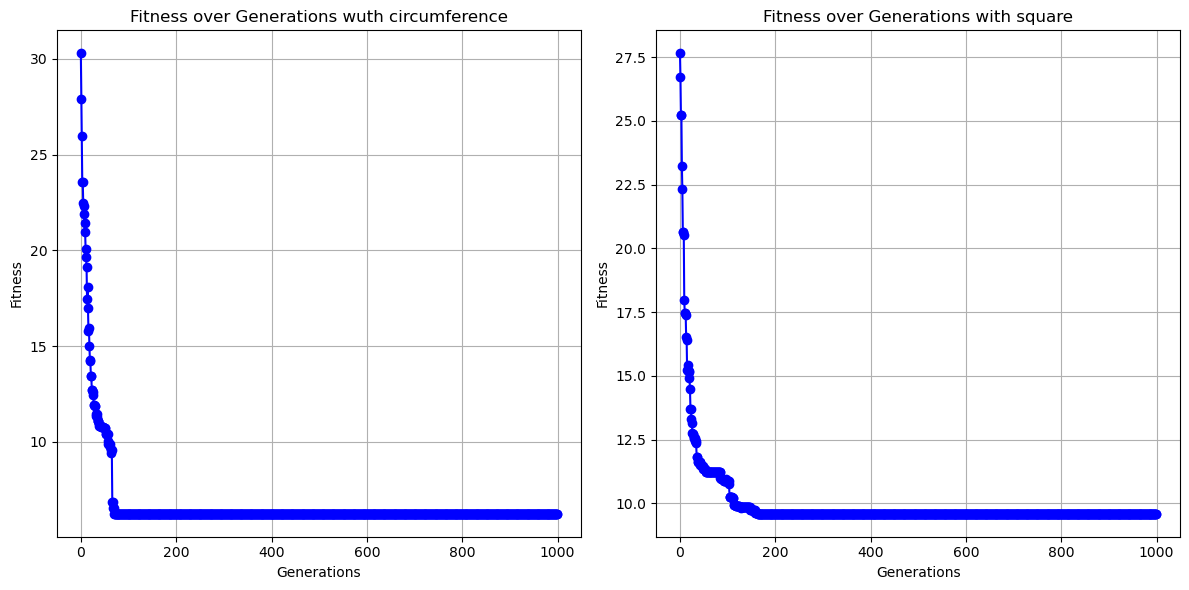

In [3]:
import matplotlib.pyplot as plt
def read_generation_fitness(filename):
    generations = []
    fitness_values = []
    with open(filename, 'r') as file:
        for line in file:
            generation, fitness = map(float, line.split())
            generations.append(generation)
            fitness_values.append(fitness)
    return generations, fitness_values

def plot_generation_fitness(ax, generations, fitness_values, title):
    ax.plot(generations, fitness_values, marker='o', linestyle='-', color='b')
    ax.set_xlabel('Generations')
    ax.set_ylabel('Fitness')
    ax.set_title(title)
    ax.grid(True)

if __name__ == "__main__":
    filename1 = 'best_fitness_circle.dat'
    filename2 = 'best_fitness_square.dat'
    
    generations1, fitness_values1 = read_generation_fitness(filename1)
    generations2, fitness_values2 = read_generation_fitness(filename2)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    plot_generation_fitness(ax1, generations1, fitness_values1, 'Fitness over Generations wuth circumference')
    plot_generation_fitness(ax2, generations2, fitness_values2, 'Fitness over Generations with square')
    
    plt.tight_layout()
    plt.show()


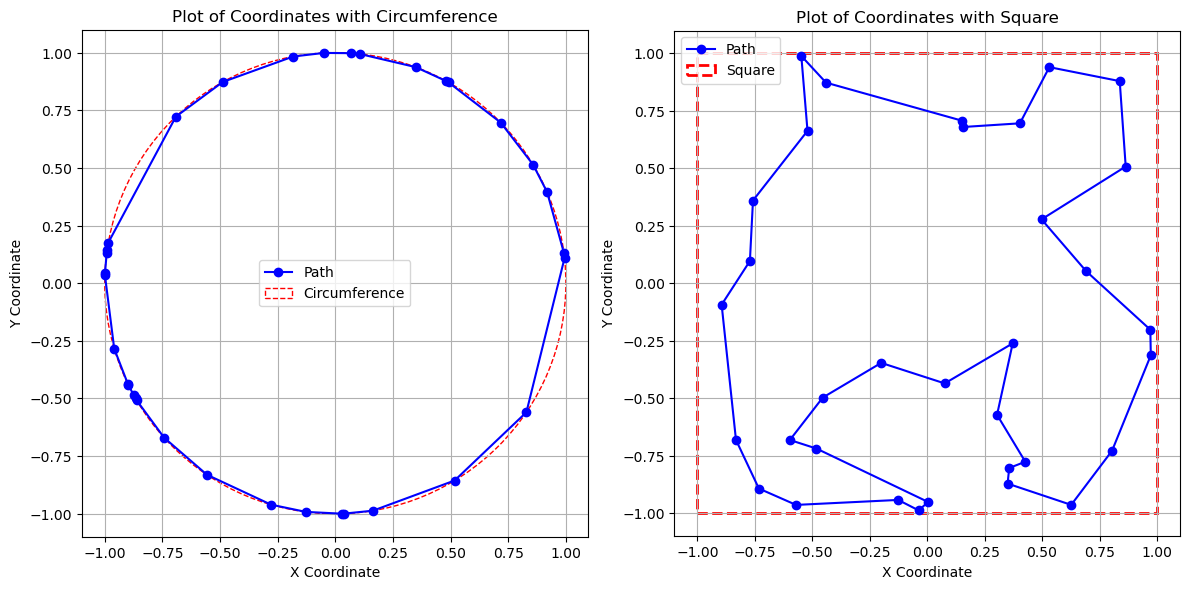

In [4]:
def read_coordinates(filename):
    x_coords = []
    y_coords = []
    with open(filename, 'r') as file:
        for line in file:
            x, y = map(float, line.split())
            x_coords.append(x)
            y_coords.append(y)
    return x_coords, y_coords

def plot_coordinates_with_circle(ax, x_coords, y_coords, radius=1):
    # Plot with lines connecting points
    ax.plot(x_coords, y_coords, marker='o', linestyle='-', color='b', label='Path')  
    
    # Connect the last point to the first point
    ax.plot([x_coords[-1], x_coords[0]], [y_coords[-1], y_coords[0]], linestyle='-', color='b')  
    
    # Plot the circle
    circle = plt.Circle((0, 0), radius, color='r', fill=False, linestyle='--', label='Circumference')
    ax.add_artist(circle)

    # Set equal scaling to ensure the circle isn't distorted
    ax.set_aspect('equal', adjustable='box')
    
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title('Plot of Coordinates with Circumference')
    ax.grid(True)
    ax.legend()

def plot_coordinates_with_square(ax, x_coords, y_coords):
    # Plot with lines connecting points
    ax.plot(x_coords, y_coords, marker='o', linestyle='-', color='b', label='Path')  
    
    # Connect the last point to the first point
    ax.plot([x_coords[-1], x_coords[0]], [y_coords[-1], y_coords[0]], linestyle='-', color='b')  
    
    # Plot the square
    square = plt.Rectangle((-1, -1), 2, 2, linewidth=2, edgecolor='r', facecolor='none', linestyle='--', label='Square')
    ax.add_patch(square)

    # Set equal scaling to ensure the square isn't distorted
    ax.set_aspect('equal', adjustable='box')
    
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title('Plot of Coordinates with Square')
    ax.grid(True)
    ax.legend()

if __name__ == "__main__":
    circle_filename = 'best_individual_circle.dat'
    square_filename = 'best_individual_square.dat'
    
    x_coords_circle, y_coords_circle = read_coordinates(circle_filename)
    x_coords_square, y_coords_square = read_coordinates(square_filename)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    plot_coordinates_with_circle(ax1, x_coords_circle, y_coords_circle)
    plot_coordinates_with_square(ax2, x_coords_square, y_coords_square)
    
    plt.tight_layout()
    plt.show()
